In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras 

In [6]:
train_dir = r'YOUR FILE PATH'
test_dir = r'YOUR FILE PATH'
valid_dir = r'YOUR FILE PATH'

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
train_gene = ImageDataGenerator(rescale=1./255,
                                rotation_range = 40,
                                width_shift_range= 0.2,
                                height_shift_range= 0.2,
                                shear_range= 0.2,
                                horizontal_flip=True)

test_gene = ImageDataGenerator(rescale=1./255)

valid_gene = ImageDataGenerator(rescale= 1./255)

In [10]:
train_data = train_gene.flow_from_directory(train_dir,
                                            target_size = (150,150),
                                            class_mode='binary')
test_data = test_gene.flow_from_directory(test_dir,
                                          target_size = (150,150),
                                          class_mode = 'binary')
valid_data = valid_gene.flow_from_directory(valid_dir,
                                            target_size = (150,150),
                                            class_mode = 'binary')

Found 5100 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 132 images belonging to 2 classes.


# CNN LAYER

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters= 30 , kernel_size = (2,2), activation = 'relu', input_shape= (150,150,3)))
model.add(keras.layers.MaxPooling2D(2,2)) 

model.add(keras.layers.Conv2D(filters=60 , kernel_size=(2,2) , activation='relu'))
model.add(keras.layers.MaxPooling2D(2,2))

model.add(keras.layers.Conv2D(filters=60 , kernel_size=(2,2) , activation='relu'))
model.add(keras.layers.MaxPooling2D(2,2))

model.add(keras.layers.Conv2D(filters=60 , kernel_size=(2,2) , activation='relu'))
model.add(keras.layers.MaxPooling2D(2,2))

c:\Users\ajink\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# ANN LAYER

In [12]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 149, 149, 30)   │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 30)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 73, 73, 60)     │         7,260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 60)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 35, 35, 60)     │        14,460 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 60)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 60)     │        14,460 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 60)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3840)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       983,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,020,123 (3.89 MB)

 Trainable params: 1,020,123 (3.89 MB)

 Non-trainable params: 0 (0.00 B)

# Compilation

In [14]:
model.compile(loss='binary_crossentropy',
             optimizer=keras.optimizers.Adam(learning_rate=0.0001),
             metrics=['accuracy'])

In [22]:
history = model.fit(train_data,
                    validation_data = valid_data,
                    batch_size=20,
                    epochs= 10)

Epoch 1/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 64s 392ms/step - accuracy: 0.9145 - loss: 0.2030 - val_accuracy: 0.9470 - val_loss: 0.1960
Epoch 2/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 63s 383ms/step - accuracy: 0.9112 - loss: 0.2061 - val_accuracy: 0.9545 - val_loss: 0.1813
Epoch 3/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 61s 371ms/step - accuracy: 0.9104 - loss: 0.2158 - val_accuracy: 0.9470 - val_loss: 0.1895
Epoch 4/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 61s 372ms/step - accuracy: 0.9244 - loss: 0.2033 - val_accuracy: 0.9545 - val_loss: 0.1846
Epoch 5/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 66s 404ms/step - accuracy: 0.9212 - loss: 0.1917 - val_accuracy: 0.9545 - val_loss: 0.1842
Epoch 6/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 71s 430ms/step - accuracy: 0.9231 - loss: 0.1897 - val_accuracy: 0.9470 - val_loss: 0.2103
Epoch 7/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 73s 441ms/step - accuracy: 0.9154 - loss: 0.2052 - val_accuracy: 0.9394 - val_loss: 0.1851
Epoch 8/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 72s 433ms/step - accuracy: 0.9271 - loss: 0

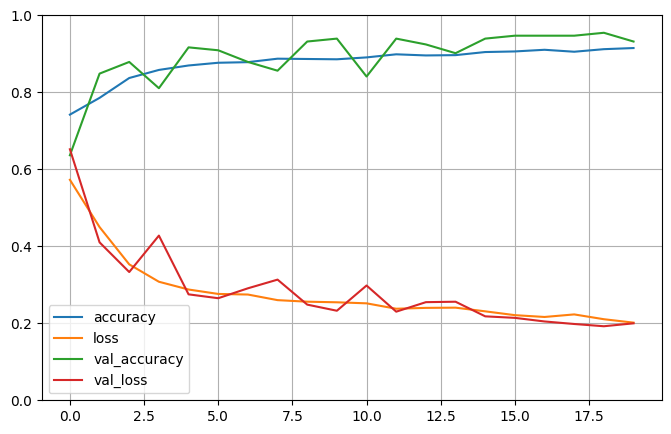

In [16]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [17]:
model.evaluate(test_data)

c:\Users\ajink\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 405ms/step - accuracy: 0.8610 - loss: 0.2943


[0.2845251262187958, 0.8766025900840759]

In [20]:
model.save('pbl.h5')
model.save('pbl.keras')